<a href="https://colab.research.google.com/github/IsWallison/Panorama_COVID_19/blob/main/Projeto_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

Primeiramente para começarmos as análises, precisamos importar algumas biblioteca, que nos auxiliarão na análise e tratamento dos dados. Panda, Matplotlib, Seaborm e Folium.

Pandas é uma ferramenta de análise e manipulação de dados de código aberto rápida, poderosa, flexível e fácil de usar, construído sobre a linguagem de programação Python.

Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. O Matplotlib torna as coisas fáceis mais fáceis e as difíceis possíveis.

Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

Datetime fornece classes para manipulação de datas e horas.


In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

sns.set_style()
%matplotlib inline

# importar o dataset COVID-19 para um DataaFrame


Importando os dados disponível [aqui](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true), no formato CSV e atribuindo a uma variável chamada df.

CSV é a sigla para Comma Separated Values (em português, valores separados por vírgulas). Um arquivo CSV é um arquivo de texto simples que armazena informações de planilhas e tabelas. O conteúdo geralmente é uma tabela de texto, números ou datas. Os arquivos CSV podem ser facilmente importados e exportados usando programas que armazenam dados em tabelas.

In [2]:
df_inicial = pd.read_csv('https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true')
df_inicial.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### Dicionário de Variáveis
Discionário de variáveis, para ajudar no entendimento geral da análise.

Os atributos do *dataset* estão descritos abaixo.
A descrição completa pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).


Atributo  | Descrição 
------------|-----------
iso_code | códigos de país de três letras
continent | Continente da localização geográfica
location | Localização geográfica
date | Data da observação
total_cases | Total de casos confirmados de COVID-19¹
new_cases | New confirmed cases of COVID-19¹ ²
new_cases_smoothed |Novos casos confirmados de COVID-19 (suavizado de 7 dias¹
total_deaths | Total de mortes atribuídas ao COVID-19
new_deaths | Novas mortes atribuídas ao COVID-19¹ ²
new_deaths_smoothed | Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias)¹
total_cases_per_million | Total de casos confirmados de COVID-19 por 1.000.000 de pessoas¹
new_cases_per_million | Novos de casos confirmados de COVID-19 por 1.000.000 de pessoas¹
new_cases_smoothed_per_million | Novos casos confirmados de COVID-19 (suavizado em 7 dias) por 1.000.000 de pessoas¹
total_deaths_per_million | Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas¹
new_deaths_per_million | Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas¹
new_deaths_smoothed_per_million | Novas mortes atribuídas ao COVID-19 (suavizado de 7 dias) por 1.000.000 de pessoas¹
reproduction_rate | Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19. [ver link](https://github.com/crondonm/TrackingR/tree/main/Estimates-Database)
icu_patients | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia
icu_patients_per_million | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 pessoas
hosp_patients | Número de pacientes com COVID-19 no hospital em um determinado dia
hosp_patients_per_million | Número de pacientes com COVID-19 no hospital em um determinado dia por 1.000.000 de pessoas
weekly_icu_admissions | Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores)
weekly_icu_admissions_per_million | Número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana por 1.000.000 pessoas (data de notificação e 6 dias anteriores)
weekly_hosp_admissions | Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana (data do relatório e 6 dias anteriores)
weekly_hosp_admissions_per_million | Número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana por 1.000.000 de pessoas (data do relatório e 6 dias anteriores)
total_tests | Total de testes para COVID-19
new_tests | Novos testes para COVID-19 (calculado apenas para dias consecutivos)
total_tests_per_thousand | Total de testes para COVID-19 por 1.000 pessoas
new_tests_per_thousand | Novos testes para COVID-19 por 1.000 pessoas
new_tests_smoothed | Novos testes para COVID-19 (suavizado de 7 dias).
new_tests_smoothed_per_thousand | Novos testes para COVID-19 (suavizado de 7 dias) por 1.000 pessoas
positive_rate | A parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case)
tests_per_case | Testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate)
tests_units | Unidades usadas pelo local para relatar seus dados de teste
total_vaccinations | Número total de doses de vacinação COVID-19 administradas
people_vaccinated | Número total de pessoas que receberam pelo menos uma dose de vacina
people_fully_vaccinated | Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial
total_boosters | Número total de doses de reforço de vacinação COVID-19 administradas
new_vaccinations | Novas doses de vacinação COVID-19 administradas
new_vaccinations_smoothed | Novas doses de vacinação COVID-19 administradas (suavizado por 7 dias)
total_vaccinations_per_hundred | Número total de doses de vacinação COVID-19 administradas por 100 pessoas na população total
people_vaccinated_per_hundred | Número total de pessoas que receberam pelo menos uma dose de vacina por 100 pessoas na população total
people_fully_vaccinated_per_hundred | Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação inicial por 100 pessoas na população total
total_boosters_per_hundred | Número total de doses de reforço de vacinação COVID-19 administradas por 100 pessoas na população total
new_vaccinations_smoothed_per_million | Novas doses de vacinação COVID-19 administradas (suavizadas em 7 dias) por 1.000.000 de pessoas na população total
new_people_vaccinated_smoothed | Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias)
new_people_vaccinated_smoothed_per_hundred | Número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias) por 100 pessoas na população total
stringency_index | Índice de Rigidez de Resposta do Governo reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa) 
population | População
population_density | Número de pessoas dividido por área de terra, medido em quilômetros quadrados (ano mais recente disponível)
median_age | Idade média da população (projeção da ONU para 2020)
aged_65_older | Parcela da população com 65 anos ou mais (ano mais recente disponível)
aged_70_older | Parcela da população com 70 anos ou mais em 2015
gdp_per_capita | Produto interno bruto em paridade de poder de compra, em dólares internacionais constantes de 2011 (ano mais recente disponível)
extreme_poverty | Percentual da população que vive em extrema pobreza, ano mais recente disponível desde 2010
cardiovasc_death_rate | Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas)
diabetes_prevalence | Prevalência de diabetes (% da população de 20 a 79 anos) em 2017
female_smokers | Proporção de mulheres que fumam (ano mais recente disponível)
male_smokers | Proporção de homens que fumam (ano mais recente disponível)
handwashing_facilities | Percentagem da população com instalações básicas de lavagem das mãos nas instalações (ano mais recente disponível)
hospital_beds_per_thousand | Camas hospitalares por 1.000 pessoas (ano mais recente disponível desde 2010)
life_expectancy | Expectativa de vida ao nascer em 2019
human_development_index | IDH - Índice de Desenvolvimento Humano (valores para 2019)
excess_mortality | Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período
excess_mortality_cumulative | Diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período
excess_mortality_cumulative_absolute | Diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período
excess_mortality_cumulative_per_million | Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período

O *dataset* também possui valores por continentes, valores esses que serão desconsiderados, uma vez que a análise será por países. Será primeiramente  criada uma lista com as regiões que se deseja remover, em seguida crio uma variável para receber os valores dos *dataframe* antigo, porém sem os valores descartados.

In [3]:
lista_regioes = ['High income','Upper middle income', 'Europe', "Asia" ,'Lower middle income' ,'South America','European Union','North America']
df = df_inicial[~df_inicial['location'].isin(lista_regioes)].copy()

df_linhas = df.shape[0]
df_colunas = df.shape[1]
print(f'Analisando o novo dataset sem os continêntes temos: {df_linhas} linhas e {df_colunas} colunas')

Analisando o novo dataset sem os continêntes temos: 232666 linhas e 67 colunas


Vamos ver a quantidade, se há muitos dados faltantes, quais os formatos e processar de acordo o necessário.

In [4]:
print('Atributos:')
for i, col in enumerate(df.columns):
  print(f'Col {i:2} : {col:45} : {df[col].dtype}')

Atributos:
Col  0 : iso_code                                      : object
Col  1 : continent                                     : object
Col  2 : location                                      : object
Col  3 : date                                          : object
Col  4 : total_cases                                   : float64
Col  5 : new_cases                                     : float64
Col  6 : new_cases_smoothed                            : float64
Col  7 : total_deaths                                  : float64
Col  8 : new_deaths                                    : float64
Col  9 : new_deaths_smoothed                           : float64
Col 10 : total_cases_per_million                       : float64
Col 11 : new_cases_per_million                         : float64
Col 12 : new_cases_smoothed_per_million                : float64
Col 13 : total_deaths_per_million                      : float64
Col 14 : new_deaths_per_million                        : float64
Col 15 : new_death

Dando destaque para coluna 'date' que está em formato de objeto e que deve ser convertida para *datetime*, uma vez que se refere as datas, o que facilitará a manipulação.

In [5]:
df['date']=pd.to_datetime(df['date'])

Agora iremos visualizar algumas estatísticas dos valores numéricos, com uma descrição dos valores teremos acesso à contagem, média, padrão, mínimo, máximo, bem como percentil inferior, 50 e superior. Por padrão, o percentil inferior é 25 e o percentil superior é 75. O percentil 50 é igual à mediana.

In [6]:
df[['total_cases','new_cases','total_deaths','new_deaths','total_cases_per_million','population','new_tests','new_vaccinations']].describe().round(2)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,population,new_tests,new_vaccinations
count,2.187140e+05,218425.00,199433.00,199249.00,217679.00,2.316310e+05,75403.00,51078.00
mean,2.386434e+06,6036.38,38983.55,67.97,65136.83,8.173160e+07,67285.41,485047.88
std,2.319622e+07,62143.43,320914.49,565.10,114495.49,5.605783e+08,247734.00,2820225.97
min,1.000000e+00,0.00,1.00,0.00,0.00,4.700000e+01,1.00,0.00
25%,4.407250e+03,0.00,109.00,0.00,1125.75,7.824570e+05,2244.00,3072.00
50%,4.537650e+04,37.00,1016.00,0.00,10627.81,6.630621e+06,8783.00,21143.00
75%,4.492512e+05,683.00,8266.00,9.00,77586.38,2.816055e+07,37229.00,118507.25
max,6.469266e+08,4083952.00,6646094.00,17733.00,690003.54,7.975105e+09,35855632.00,49677470.00


Foram identificados alguns valores nulos/ausentes.

Para analisar a porcentagem de valores ausentes, vamos achar a quantidade total de valores ausentes e dividir pelo total de linhas, posteriormente multiplicar por 100 para achar o valor em porcentagem, a ordem será colocada do maior para a menor.

In [7]:
#nulos
((df.isnull().sum())/df.shape[0]).sort_values(ascending=False).round(2)  

weekly_icu_admissions                      0.97
weekly_icu_admissions_per_million          0.97
excess_mortality_cumulative_per_million    0.97
excess_mortality_cumulative                0.97
excess_mortality_cumulative_absolute       0.97
                                           ... 
continent                                  0.02
population                                 0.00
date                                       0.00
location                                   0.00
iso_code                                   0.00
Length: 67, dtype: float64

Temos dados ausente em praticamente todas as colunas, population, date,location e iso_code são as únicas que não possuem dados ausentes. Esses dados faltante pode significar várias coisas diferentes, talvez o campo não fosse aplicável, ou os dados não estavam disponíveis. Pode ser que a pessoa que inseriu os dados não sabia o valor certo, ou não se preocupou que um campo não fosse preenchido.

Agora iremos analisar os números de casos e mortes por *COVID-19*, para descobrirmos que conclusões poderemos chegar.

Primeiramente vou criar 3 novar variáveis(cases,populations e death) e atribuir a elas os maiores valores de casos, população e mortes.
Em seguida vamos descobrir as regiões que possuem que tem a maior quantidade absoluta de mortes por *COVID-19* e os países  com maior número de casos. 

In [8]:
cases = (df.groupby('location')['total_cases'].max())
population = (df.groupby('location')['population'].max())
deaths=(df.groupby('location')['total_deaths'].max())
deaths.sort_values(ascending=False)[0:8]

location
World            6646094.0
United States    1083362.0
Brazil            690229.0
India             530647.0
Russia            384494.0
Mexico            330633.0
Africa            257332.0
Peru              217566.0
Name: total_deaths, dtype: float64

Em relação às mortes, os países que lideravam aos 07 de Dezembro de 2022 em relação ao número de mortes eram:

* Estados Unidos - 1.082.224 de mortes;
* Brasil - 690.229 de mortes;
* Índia - 530.638.0 de mortes;
* Rússia - 384.437 de mortes;
* México - 330.602 de mortes.

Gráfico para visualizarmos os 5 países  com o maior número de mortes por COVID-19

Text(0.5, 0, '')

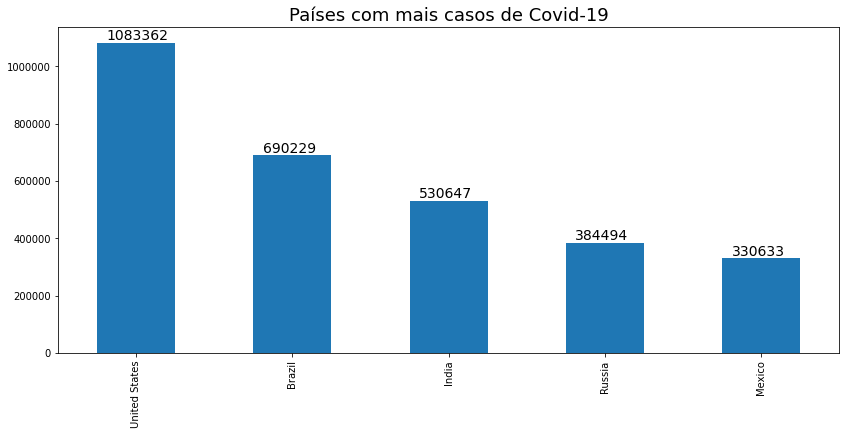

In [9]:
# gráfico de barras para total de mortes
a = (df.groupby('location')['total_deaths'].max()).sort_values(ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(14,6))
ax.ticklabel_format(axis='y', style='plain')
ax.set_title("Países com mais casos de Covid-19",fontsize=18)

for i, v in enumerate(a):
    ax.text(i-.19, 
            a[i]+10000, 
            int(a[i]), 
            fontsize=14, 
            color="black")
    
a.plot(kind='bar');
ax.set_xlabel("")

Quantos porcentos os países com o maior número de mortos representam do total.

In [10]:
#relação em porcentagem do total de mortes para cada pais
((deaths/deaths.max())*100).sort_values(ascending=False)[1:11]

location
United States     16.300732
Brazil            10.385484
India              7.984344
Russia             5.785263
Mexico             4.974847
Africa             3.871928
Peru               3.273592
United Kingdom     3.194297
Italy              2.734433
Indonesia          2.409114
Name: total_deaths, dtype: float64

Fazendo a soma da porcentagem das mortes dos 3 países com o maior número de mortes.

In [11]:
percent_death=0
for i in range(3): 
 percent_death = percent_death + ((deaths/deaths.max())*100).sort_values(ascending=False)[i+1] 
print(f'Estados Unidos, Brazil e Índia são reponsáveis por {percent_death:.2f}% de todas as mortes por COVID-19 do mundo.')

Estados Unidos, Brazil e Índia são reponsáveis por 34.67% de todas as mortes por COVID-19 do mundo.


Estados Unidos, Brasil e Índia são o top 3 países com maior número de pessoas que faleceram de *COVID-19* representando mais de 34% de todas as mortes do mundo.

Uma visão dos países com os maiores números de casos.


In [12]:
cases.sort_values(ascending=False)[1:11]

location
United States     99230740.0
India             44675413.0
France            38299645.0
Germany           36690235.0
Brazil            35396191.0
South Korea       27548821.0
Japan             25576875.0
Italy             24488080.0
United Kingdom    24024746.0
Russia            21329068.0
Name: total_cases, dtype: float64

Em relação aos casos, os países que lideravam aos 07 de Dezembro de 2022 eram:

* Estados Unidos - 99.077.996
* Índia - 44.675.172 
* França - 38.223.893

Olhando esses dados uma questão interessante surge, a França tem mais casos que o Brazil, porém tem menos mortes, algumas hipóteses para a frança ter menos mortes são: 
* O pais ter testado mais pessoas.
* A população pode de alguma forma ser mais resistente.
* A população pode ter sido vacinada de forma mais rápida e eficiente.

Analisando um pouco mais a fundo essa relação de casos e mortes entre o Brazil e França.

In [13]:
france_case = df[df['location']=='France']['total_cases'].max()
brazil_case = df[df['location']=='Brazil']['total_cases'].max()

france_death = df[df['location']=='France']['total_deaths'].max()
brazil_death = df[df['location']=='Brazil']['total_deaths'].max()

print(f'Na França tiveram {int(france_case)} casos e {int(france_death)} mortes. ')
print(f'Na Brasil tiveram {int(brazil_case)} casos e {int(brazil_death)} mortes. ')
x_death = (brazil_death)*100/(france_death)
x_cases = (france_case-brazil_case)*100/(france_case)
print(f'o Brasil teve {x_death:.2f}% mais mortes que a frança e {x_cases:.2f}% menos casos de COVID-19 que a França. ')

Na França tiveram 38299645 casos e 159524 mortes. 
Na Brasil tiveram 35396191 casos e 690229 mortes. 
o Brasil teve 432.68% mais mortes que a frança e 7.58% menos casos de COVID-19 que a França. 


Para fazer as análises irei criar dois novos *dataset* referentes ao Brasil para analisar a relação da vacinação dos dois países.

In [14]:
df_brasil = df[(df['location']=="Brazil")].copy()
df_france = df[(df['location']=="France") ].copy()
df_world = df[df['location']=="World"].copy()

df_brasil = df_brasil.set_index('date')
df_france = df_france.set_index('date')

Vacinação por total da população

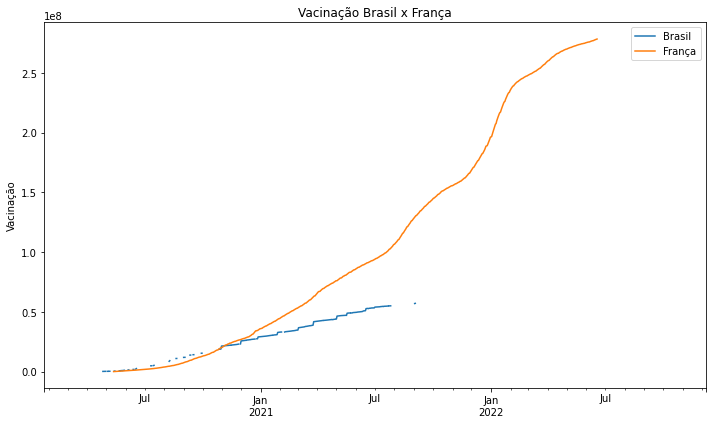

In [15]:
df_population_vaccinated_france = df_france['people_vaccinated']/df_france['population']
df_population_vaccinated_brasil = df_brasil['people_vaccinated']/df_brasil['population']

df_tested_france = df_france['total_tests']
df_tested_brasil = df_brasil['total_tests']


fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
df_tested_brasil.plot(kind='line',ax=ax,label='Brasil')
ax.set_title("Vacinação Brasil x França")
ax.set_ylabel("Vacinação")


df_tested_france.plot(kind="line",ax=ax,label='França')
ax.set_xlabel("")

plt.tight_layout()
plt.legend(loc='best')

Os dados referentes as pessoas testadas no Brasil estão faltando, inviabilizando assim então a comparação entre as pessoas testadas no Brasil e na França.

Agora iremos analisar a vacinação dos dois países .

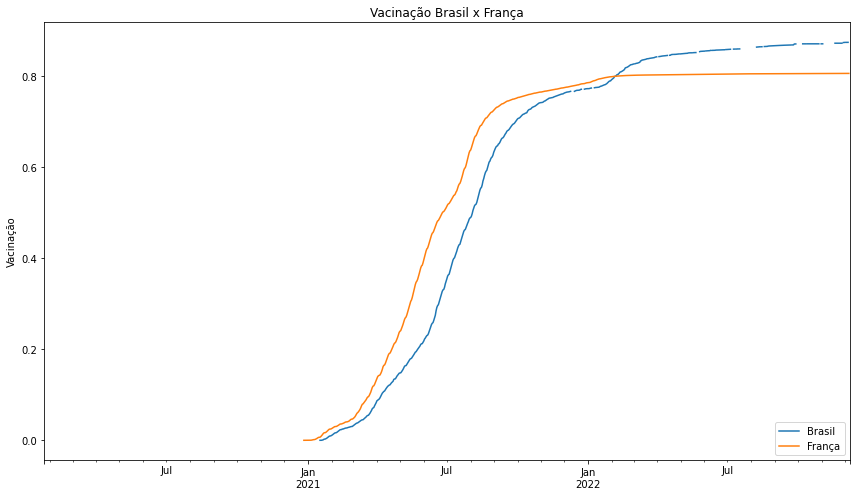

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,7))
df_population_vaccinated_brasil.plot(kind='line',ax=ax,label='Brasil')
ax.set_title("Vacinação Brasil x França")
ax.set_ylabel("Vacinação")

df_population_vaccinated_france.plot(kind="line",ax=ax,label='França')
ax.set_xlabel("")

plt.tight_layout()
plt.legend(loc='lower right')

Não exitem tanta diferença na taxa de vacinação da população dos dois países .

Uma vez que os dados dos testes do Brasil estão faltando, não foi possível confirmar o real motivo do Brasil ter menos casos e mais mortes que a frança.

Seguindo em frente iremos analisar os países  com a maior porcentagem de mortes em relação a sua população total.


In [17]:
#morte por total da população
((deaths/population)*100).sort_values(ascending=False)[:5].round(2)

location
Peru                      0.64
Bulgaria                  0.56
Bosnia and Herzegovina    0.50
Hungary                   0.48
North Macedonia           0.46
dtype: float64

Peru, Bulgária e Bósnia e Herzegovina são os países  com a maior taxa de morte por população.

Agora vamos descobrir quais países possuem os maiores PIBs per carpital.

In [18]:
pib = df.groupby('location')['gdp_per_capita'].max()
df2 = df.set_index('location')
pib = df2[(df2['date']=="2022-12-07")]['gdp_per_capita']

pib.sort_values(ascending=False)[0:10]

location
Qatar                   116935.600
Macao                   104861.851
Luxembourg               94277.965
Singapore                85535.383
Brunei                   71809.251
Ireland                  67335.293
United Arab Emirates     67293.483
Kuwait                   65530.537
Norway                   64800.057
Switzerland              57410.166
Name: gdp_per_capita, dtype: float64

Com os dados disponíveis em 07 de Dezembro de 2022 os 5 países com os maiores PIB per capital são:


País  | PIB per capital 
------------|-----------
Qatar | 116.935,60
Macao | 104.861,85
Luxemburgo | 94.277,96
Singapura| 85.535,38
Brunei | 71.809,25


Agora vamos visualizar um gráfico com a distribuição do número de mortes em relação ao PIB per carpital.

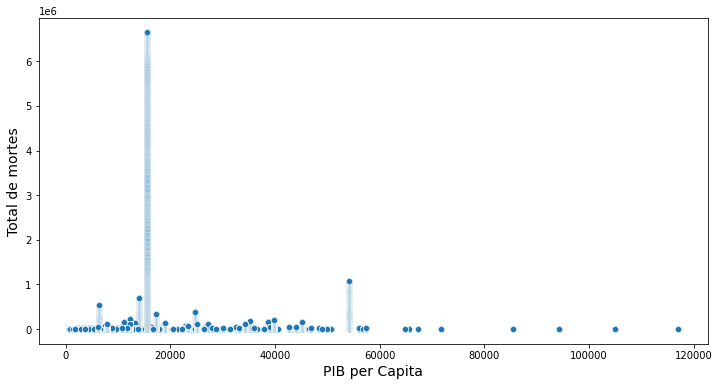

In [19]:
# plotando disperão do número de mortos por renda per capita
plt.figure(figsize = (12, 6))
sns.scatterplot(data=df, x='gdp_per_capita', y='total_deaths')
plt.xlabel("PIB per Capita", size = 14)
plt.ylabel("Total de mortes", size = 14)
plt.show()
     

Percebemos que países  com os maiores PIB per capital aparentemente tendem a ter menos mortes de COVID-19.

In [20]:
(df.groupby('gdp_per_capita')['total_deaths'].max()).sort_index(ascending=False)

gdp_per_capita
116935.600     685.0
104861.851       6.0
94277.965     1168.0
85535.383     1707.0
71809.251      225.0
               ...  
926.000        314.0
808.133       1456.0
752.788        294.0
702.225         38.0
661.240        113.0
Name: total_deaths, Length: 196, dtype: float64

### Análise Exploratória para o Brasil
Nessa análise do Brasil iremos:

* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [21]:
#primeiro caso de *COVID-19* no Brasil
primeiro_caso = df_brasil[df_brasil['total_cases'] > 0 ][:1]
print(f'O primeiro caso no Brasil ocorreu em : {primeiro_caso.index[0]}')

O primeiro caso no Brasil ocorreu em : 2020-02-26 00:00:00


In [22]:
#primeira morte de *COVID-19* no Brasil
primeira_morte = df_brasil[df_brasil['total_deaths'] > 0 ][:1]
print(f'a primeira morte no Brasil ocorreu em : {primeira_morte.index[0]}')

a primeira morte no Brasil ocorreu em : 2020-03-17 00:00:00


In [23]:
diferenca_morte = (primeira_morte.index-primeiro_caso.index)
print(f'foram {diferenca_morte[0]} do primeiro caso até a primeira morte')


foram 20 days 00:00:00 do primeiro caso até a primeira morte


Agora vamos visualizar um gráfico com o total de mortes e total de casos no Brasil.

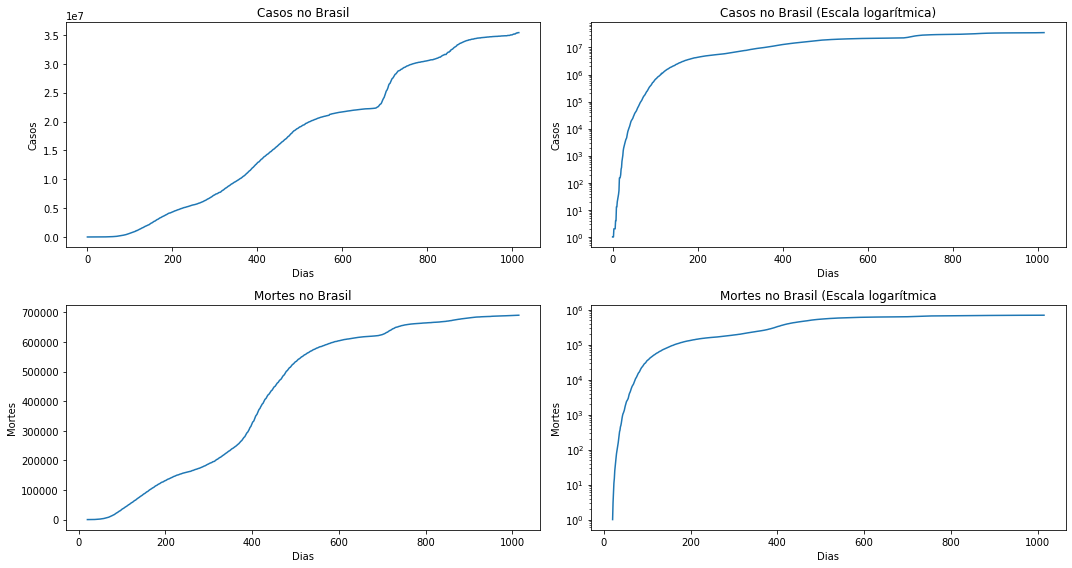

In [24]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(len(df_brasil)))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')

ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.tight_layout()



Uma matriz de correlação é uma tabela que indica os coeficientes de conexão entre os fatores. Cada célula da tabela mostra a conexão entre os dois fatores. A correlação é um número que varia entre -1 e 1. Em estatística é representado pela letra r. Uma correlação pode ser positiva(r > 0), o que significa que ambas as variáveis se movem na mesma direção ou são negativas(r < 0), o que significa que se movem em direções opostas, ou seja, quando o valor de uma variável aumenta, o valor da outra variáveis diminui. A correlação também pode ser nula ou zero, o que significa que as variáveis não estão relacionadas.

Correlação positiva: ambas as variáveis mudam na mesma direção.
Correlação Nula: Nenhuma relação na mudança das variáveis
Correlação Negativa: as variáveis mudam em direções opostas.

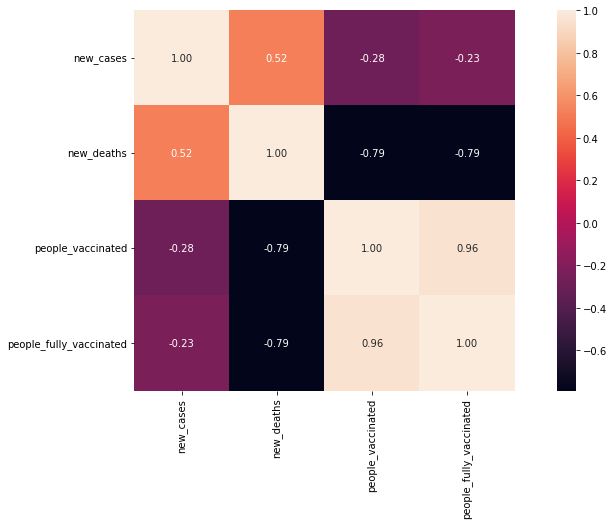

In [25]:
corr = df_brasil[['new_cases','new_deaths','people_vaccinated','people_fully_vaccinated',]].corr()
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(corr,fmt='.2f', square=True,linecolor='white', annot=True);

Analisando a matriz de correlação acima, percebemos que existe uma relação negativa bastante forte em relação a pessoas vacinadas e novas mortes, sugerindo que quanto mais pessoas vacinadas menos mortes ocorrem.

# Conclusão

Neste notebook pudemos estudar um pouco os dados referentes ao COVID-19. Tendo o banco de dados sido obtido pela organização Our World in Data, no mês de dezembro de 2022, com isso resultados obtidos refletem somente o momento em que os dados foram analisados.


##Em relação às mortes, os países que lideravam aos 07 de Dezembro de 2022 em relação ao número de mortes eram: 

* Estados Unidos - 1.082.224 de mortes;
* Brasil - 690.229 de mortes;
* Índia - 530.638.0 de mortes;

Estados Unidos, Brasil e Índia representam mais de 34% de todas as mortes do mundo.


## Em relação aos casos, os países que lideravam aos 07 de Dezembro de 2022 eram:

* Estados Unidos - 99.077.996
* Índia - 44.675.172 
* França - 38.223.893



## Em relação aos países com a maior porcentagem de mortes em relação a sua população total.

* Peru - 0.64
* Bulgaria - 0.56
* Bosnia and Herzegovina - 0.50

## Aparentemente que países  com os maiores PIB per capital tendem a ter menos mortes de COVID-19.

  País  | PIB per capital | Mortes | Population
  ------------|-----------|-----------|-----------
  Qatar | 116.935,60 | 685 | 2.695.131
  Macao | 104.861,85 | 6 | 695.180
  Luxemburgo | 94.277,96 | 1168 | 647.601
  Singapura| 85.535,38 | 1707 | 5.637.022
  Brunei | 71.809,25 | 225 | 449.002

#COVID-19 no Brasil:

* O primeiro caso no Brasil ocorreu em 26 de fevereiro de 2020 e a primeira morte no Brasil ocorreu em 17 de abril de 2020, foram 20 dias do primeiro caso até a primeira morte.

* Relação entre pessoas vacinadas e novas mortes, quanto mais pessoas vacinada menos mortes ocorrem.
